In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/utils')
from metacells_derivation import preprocess, assign_metacells, create_mc_matrix, preprocess_mc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
# Some plotting aesthetics 
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['savefig.directory'] = '/group/testa/Project/OvarianAtlas/atlas_project/plots_def/metacells/'

In [3]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/immune/'
genes = '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/4_hdg/Tables/atlas_hdg_dispersion_patients_immunes.csv'

In [4]:
adata = sc.read(initDir + 'seacells_assignment_hdg_patients.h5ad')

In [5]:
ad = create_mc_matrix(adata)

100%|██████████| 15042/15042 [09:08<00:00, 27.41it/s]


In [6]:
adata.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,patient_id,...,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,cell_labels_ratio,max,assignment,leiden-1.8,SEACell,SEACell_patient_tissue
AAACCTGAGAGTACCG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.050084,-0.097049,0.215650,0.589760,2.219361,HematopoieticMSK,CancerMSK,9,SEACell-25,SEACell-25_Geistlinger_59_Metastasis
AAACCTGCATGATCCA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.177983,0.006355,0.416833,1.388203,2.309167,HematopoieticMSK,CancerMSK,3,SEACell-3,SEACell-3_Geistlinger_59_Metastasis
AAACCTGGTAAGGATT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-0.039634,-0.114327,0.483248,1.703693,3.525502,HematopoieticMSK,CancerMSK,42,SEACell-33,SEACell-33_Geistlinger_59_Metastasis
AAACCTGGTACTTAGC-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.365517,0.366107,0.627273,1.428834,1.051465,HematopoieticMSK,CancerMSK,30,SEACell-0,SEACell-0_Geistlinger_59_Metastasis
AAACGGGAGAAGGCCT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-0.191441,-0.155673,0.448619,0.612292,1.364838,HematopoieticMSK,CancerMSK,17,SEACell-2,SEACell-2_Geistlinger_59_Metastasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTCTAACTCGACGACC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-0.270481,-0.164039,-0.449336,2.722578,2.722578,HematopoieticMSK,HematopoieticMSK,3,SEACell-37,SEACell-37_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTCTGTAAGACATAGT,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-0.212169,-0.142051,-0.226641,0.595810,0.595810,HematopoieticMSK,HematopoieticMSK,8,SEACell-67,SEACell-67_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTCTTGACACCACATA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,0.004959,-0.194718,-0.201846,1.998491,403.033928,HematopoieticMSK,HematopoieticMSK,6,SEACell-139,SEACell-139_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTGCTGCCACGGTGCT,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-0.413809,-0.193437,-0.307406,1.054732,1.054732,HematopoieticMSK,HematopoieticMSK,6,SEACell-23,SEACell-23_Vasquez_118_Metastasis


In [7]:
adata.obs['SEACell'] = adata.obs['SEACell_patient_tissue']

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


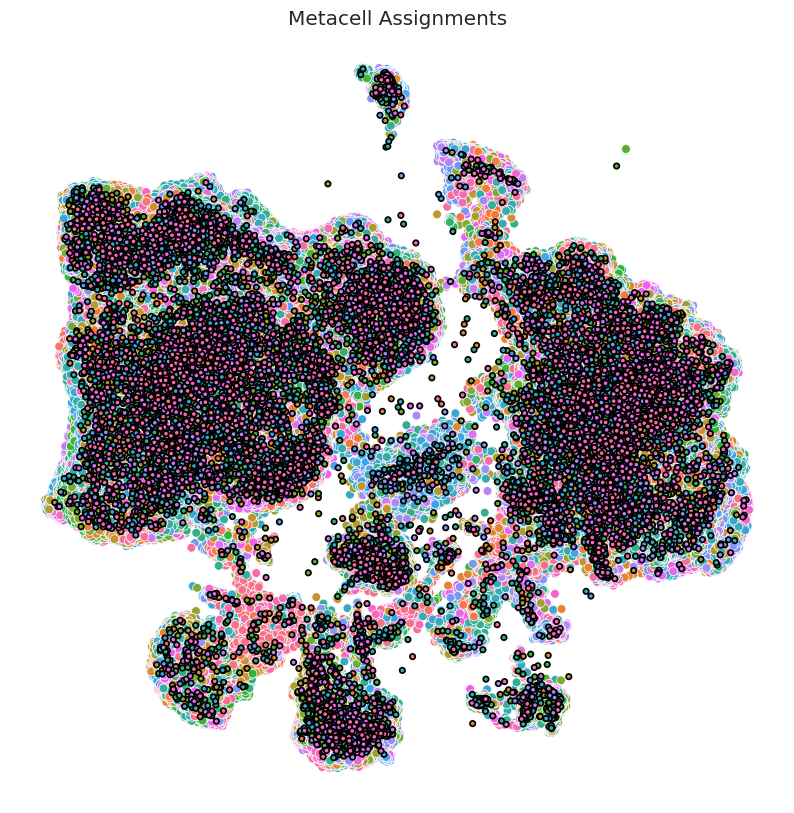

In [8]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True, SEACell_size=15, cell_size=40, figsize=(10, 10))

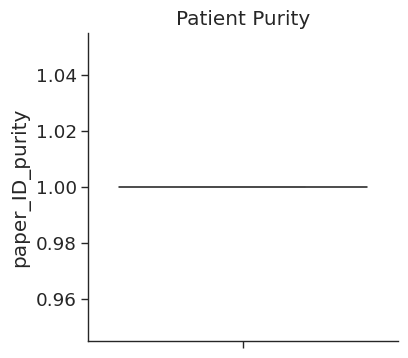

,paper_ID,paper_ID_purity
SEACell,,
SEACell-0_Geistlinger_59_Metastasis,Geistlinger_59,1.0
SEACell-0_Geistlinger_76_Metastasis,Geistlinger_76,1.0
SEACell-0_Geistlinger_77_Metastasis,Geistlinger_77,1.0
SEACell-0_Geistlinger_89_Metastasis,Geistlinger_89,1.0
SEACell-0_Geistlinger_90_Metastasis,Geistlinger_90,1.0


In [9]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata, 'paper_ID')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='paper_ID_purity')
plt.title('Patient Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

Determing nearest neighbor graph...


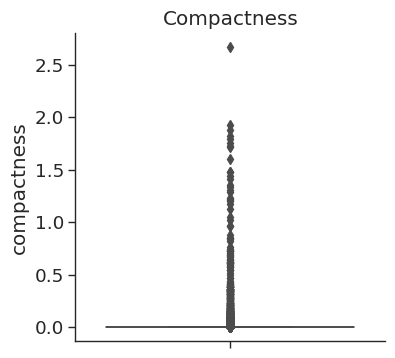

,compactness
SEACell,
SEACell-0_Geistlinger_59_Metastasis,0.000117
SEACell-0_Geistlinger_76_Metastasis,0.015755
SEACell-0_Geistlinger_77_Metastasis,0.000746
SEACell-0_Geistlinger_89_Metastasis,0.002021
SEACell-0_Geistlinger_90_Metastasis,0.002741


In [10]:
compactness = SEACells.evaluate.compactness(adata, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

Determing nearest neighbor graph...


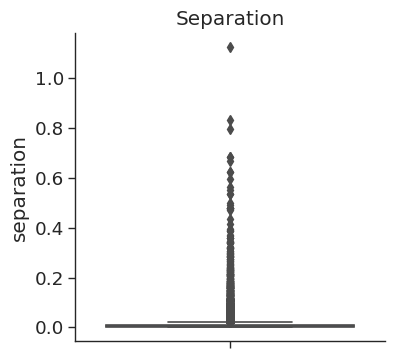

,separation
SEACell,
SEACell-0_Geistlinger_59_Metastasis,0.005559
SEACell-0_Geistlinger_76_Metastasis,0.056601
SEACell-0_Geistlinger_77_Metastasis,0.011775
SEACell-0_Geistlinger_89_Metastasis,0.009476
SEACell-0_Geistlinger_90_Metastasis,0.010352


In [11]:
separation = SEACells.evaluate.separation(adata, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()